In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from sklearn import set_config
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
InteractiveShell.ast_node_interactivity = "all"
set_config(display="diagram")

In [3]:
df = pd.read_csv("top10s.csv", index_col=0)
df.head()
df.shape

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


(603, 14)

In [4]:
df.isnull().sum()

title           0
artist          0
genre           0
year            0
tempo           0
energy          0
danceability    0
loudness        0
liveness        0
valence         0
length          0
acousticness    0
speechiness     0
popularity      0
dtype: int64

In [5]:
df = df.drop_duplicates()
df.shape

(603, 14)

In [6]:
df[df.title == 'Company']

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
302,Company,Justin Bieber,canadian pop,2015,95,80,59,-5,8,43,208,13,6,72
397,Company,Justin Bieber,canadian pop,2016,95,80,59,-5,8,43,208,13,6,72


# Drop year, title, and deduplicate rows

In [8]:
yearless_df = df.drop(['year', 'title', 'popularity'], axis=1)
yearless_df.drop_duplicates()

,artist,genre,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness
1,Train,neo mellow,97,89,67,-4,8,80,217,19,4
2,Eminem,detroit hip hop,87,93,75,-5,52,64,263,24,23
3,Kesha,dance pop,120,84,76,-3,29,71,200,10,14
4,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4
5,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...
599,Mark Ronson,dance pop,104,66,61,-7,20,16,176,1,3
600,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12
601,DJ Khaled,dance pop,136,76,53,-5,9,65,260,7,34
602,Mark Ronson,dance pop,114,79,60,-6,42,24,217,1,7


In [10]:
df['genre'].value_counts()

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
art pop                        8
complextro                     6
hip pop                        6
australian dance               6
atl hip hop                    5
australian pop                 5
edm                            5
permanent wave                 4
latin                          4
hip hop                        4
colombian pop                  3
tropical house                 3
brostep                        2
downtempo                      2
electronic trap                2
belgian edm                    2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

# Super categorization of top genre's feature

In [11]:
for i in yearless_df['top genre']:
    if 'pop' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')
        
    elif 'hip hop' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'hip hop')

    elif 'edm' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')

    elif 'r&b' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'pop')

    elif 'latin' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'latin')

    elif 'room' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'room')

    elif 'electro' in i:
        yearless_df['top genre'] = yearless_df['top genre'].replace(i, 'edm')
        
yearless_df['top genre'] = yearless_df['top genre'].replace('chicago rap', 'hip hop')
        
yearless_df["top genre"]

KeyError: 'top genre'

In [10]:
yearless_df['top genre'].value_counts()

pop                        495
boy band                    15
hip hop                     15
room                        12
edm                         12
british soul                11
neo mellow                   9
complextro                   6
australian dance             6
latin                        5
permanent wave               4
tropical house               3
brostep                      2
downtempo                    2
alaska indie                 1
irish singer-songwriter      1
hollywood                    1
house                        1
celtic rock                  1
contemporary country         1
Name: top genre, dtype: int64

In [22]:
yearless_df

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
1,Train,neo mellow,97,89,67,-4,8,80,217,19,4
2,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
3,Kesha,pop,120,84,76,-3,29,71,200,10,14
4,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
5,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4
...,...,...,...,...,...,...,...,...,...,...,...
599,Mark Ronson,pop,104,66,61,-7,20,16,176,1,3
600,Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12
601,DJ Khaled,pop,136,76,53,-5,9,65,260,7,34
602,Mark Ronson,pop,114,79,60,-6,42,24,217,1,7


In [11]:
temp_df = yearless_df
value_counts = temp_df.stack().value_counts() # Entire DataFrame 
to_remove = value_counts[value_counts <= 3].index
temp_df.replace(to_remove, 'other', inplace=True)
temp_df['top genre'].value_counts()
temp_df.head()
temp_df.shape

pop                 495
hip hop              15
boy band             15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
complextro            6
australian dance      6
latin                 5
permanent wave        4
Name: top genre, dtype: int64

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
1,other,neo mellow,97,89,67,-4,8,80,217,19,4
2,other,hip hop,87,93,75,-5,52,64,263,24,23
3,Kesha,pop,120,84,76,-3,29,71,200,10,14
4,Lady Gaga,pop,other,92,70,-4,8,71,other,0,4
5,Bruno Mars,pop,other,84,64,-5,9,43,221,2,4


(603, 11)

In [12]:
yearless_df['top genre'] = temp_df['top genre']
yearless_df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist']] = df[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'artist']]
yearless_df['top genre'].value_counts()
yearless_df.head()

pop                 495
hip hop              15
boy band             15
other                13
room                 12
edm                  12
british soul         11
neo mellow            9
complextro            6
australian dance      6
latin                 5
permanent wave        4
Name: top genre, dtype: int64

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
1,Train,neo mellow,97,89,67,-4,8,80,217,19,4
2,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
3,Kesha,pop,120,84,76,-3,29,71,200,10,14
4,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
5,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4


In [13]:
new_df = yearless_df
new_df.artist.unique()

array(['Train', 'Eminem', 'Kesha', 'Lady Gaga', 'Bruno Mars',
       'Justin Bieber', 'Taio Cruz', 'OneRepublic', 'Alicia Keys',
       'Rihanna', 'Flo Rida', 'Mike Posner', 'Far East Movement', 'Usher',
       'Sean Kingston', 'The Black Eyed Peas', 'Adam Lambert', 'Maroon 5',
       'Neon Trees', 'Selena Gomez & The Scene', 'Enrique Iglesias',
       'Katy Perry', 'Britney Spears', '3OH!3', 'David Guetta',
       'Christina Aguilera', 'Florence + The Machine', 'Shakira',
       'Tinie Tempah', 'T.I.', 'Martin Solveig', 'Christina Perri',
       'Adele', 'Pitbull', 'Beyonc�', 'Hot Chelle Rae', 'Avril Lavigne',
       'Kanye West', 'LMFAO', 'Jessie J', 'Jennifer Lopez', 'Chris Brown',
       'Sleeping At Last', 'Nicki Minaj', 'P!nk', 'Coldplay',
       'One Direction', 'Taylor Swift', 'Carly Rae Jepsen',
       'Kelly Clarkson', 'Owl City', 'The Wanted', 'fun.',
       'Ellie Goulding', 'Gym Class Heroes', 'Avicii', 'The Script',
       'Miley Cyrus', 'Swedish House Mafia', 'Daft Punk'

In [14]:
new_df.isnull().any()
new_df = new_df.drop_duplicates()
new_df = new_df.reset_index(drop=True)
new_df.head()

artist       False
top genre    False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
dtype: bool

,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,Train,neo mellow,97,89,67,-4,8,80,217,19,4
1,Eminem,hip hop,87,93,75,-5,52,64,263,24,23
2,Kesha,pop,120,84,76,-3,29,71,200,10,14
3,Lady Gaga,pop,119,92,70,-4,8,71,295,0,4
4,Bruno Mars,pop,109,84,64,-5,9,43,221,2,4


<Axes: xlabel='bpm', ylabel='Count'>

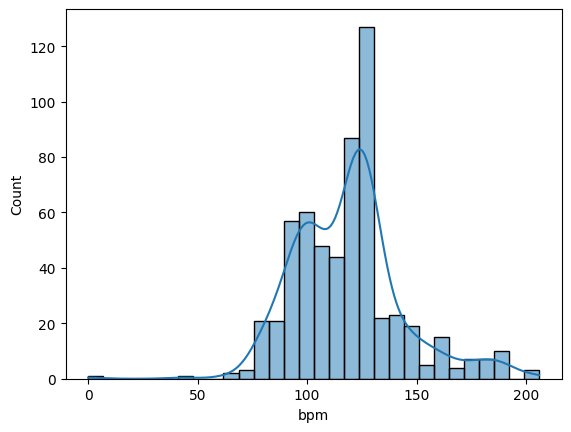

<Axes: xlabel='nrgy', ylabel='Count'>

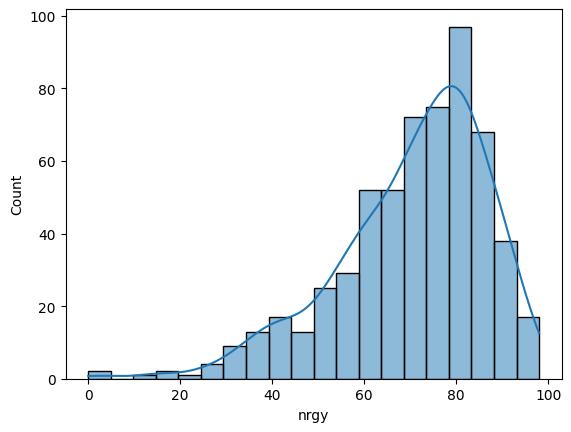

<Axes: xlabel='dnce', ylabel='Count'>

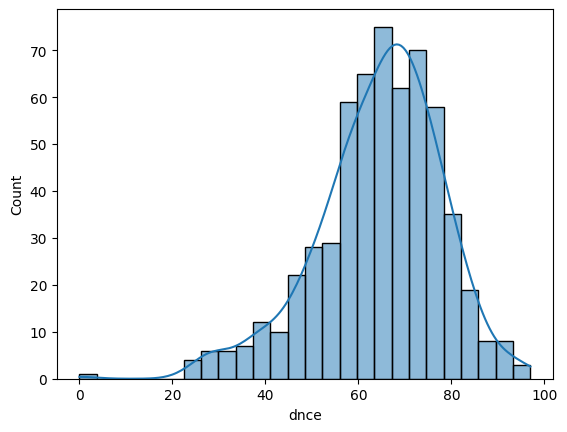

<Axes: xlabel='dB', ylabel='Count'>

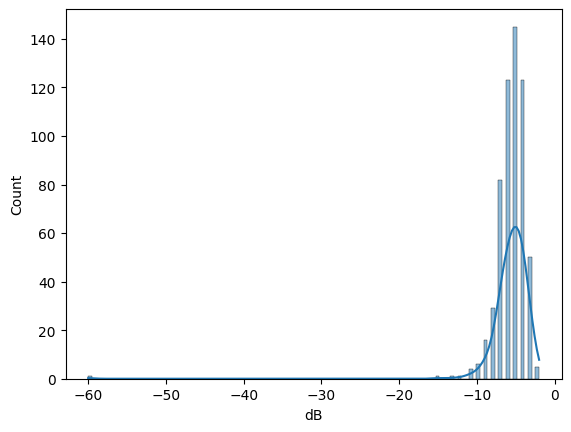

<Axes: xlabel='live', ylabel='Count'>

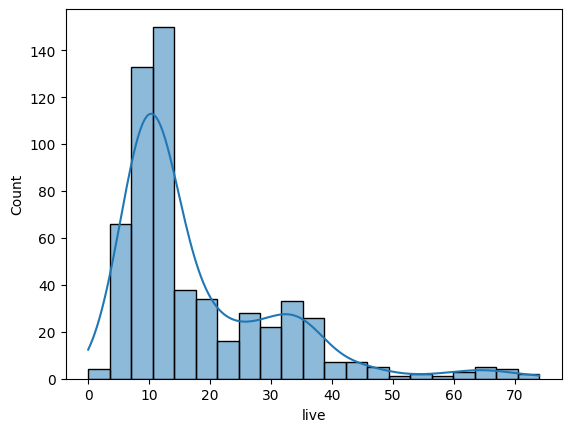

<Axes: xlabel='val', ylabel='Count'>

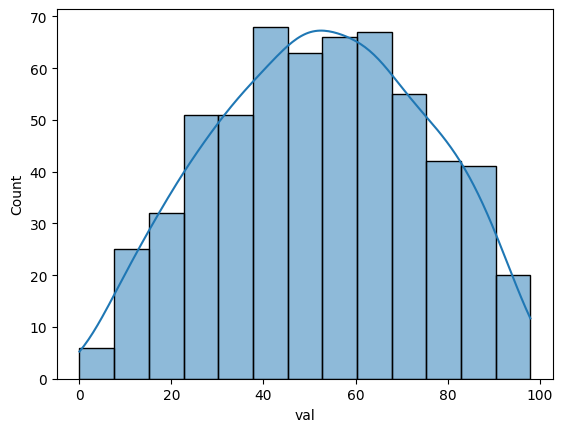

<Axes: xlabel='dur', ylabel='Count'>

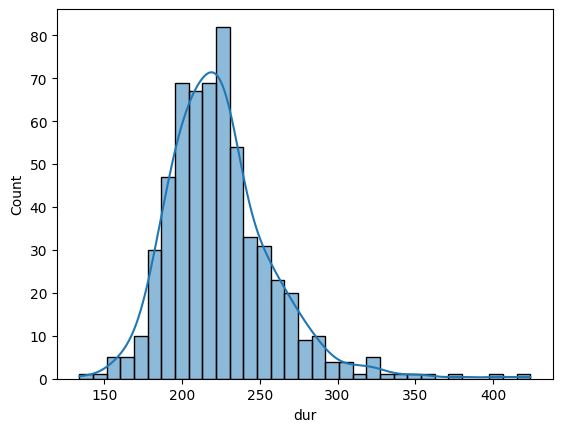

<Axes: xlabel='acous', ylabel='Count'>

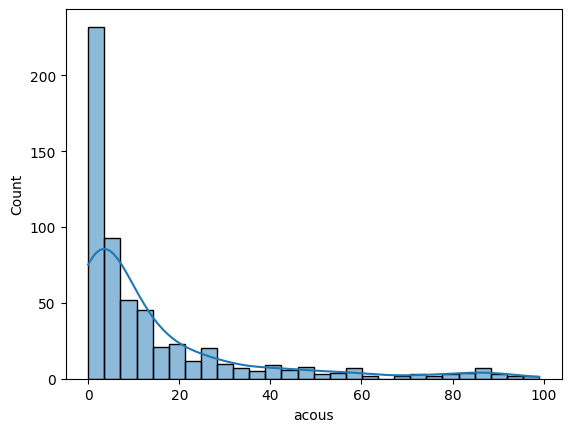

<Axes: xlabel='spch', ylabel='Count'>

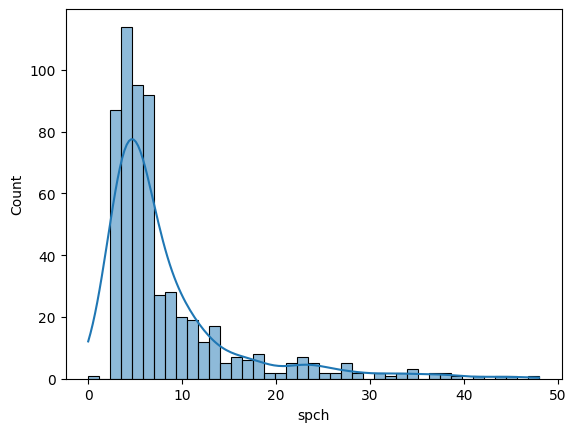

In [15]:
dtypes = new_df.dtypes
cols = list(dtypes[dtypes == "int64"].index)
for col in cols:
    sns.histplot(new_df[col], kde=True)
    plt.show()

In [16]:
new_df.bpm.unique()
new_df.dB.unique()

array([ 97,  87, 120, 119, 109,  65, 148,  93, 126, 128, 145, 130, 122,
       125, 121,  99, 186, 103, 146, 133, 129, 135, 138,  92, 111, 164,
       131, 150, 104, 182, 112,  43,  91,  80, 139, 105, 127,  94, 110,
       100, 124, 175,  95, 152, 132,  63,  84,  75,  98, 144, 140,  77,
       117, 108,  86, 116, 160, 134, 184,  90, 114,  85, 180, 170, 174,
       155, 118, 185, 136,  82, 102, 107, 201,  96,  83, 192,  76, 149,
        79, 113, 115, 206, 190, 158, 176, 123, 106,  78, 156,  89, 202,
       142, 163, 101,   0, 159,  81,  73, 178, 181, 167, 172,  88, 168])

array([ -4,  -5,  -3,  -6,  -8,  -7,  -2,  -9, -11, -12, -10, -15, -13,
       -60])

In [17]:
new_df.bpm = new_df.bpm.replace(0, new_df.bpm.mean())
new_df.bpm.unique()
new_df.dB = new_df.dB.replace(-60, new_df.dB.mean())
new_df.dB.unique()

array([ 97.       ,  87.       , 120.       , 119.       , 109.       ,
        65.       , 148.       ,  93.       , 126.       , 128.       ,
       145.       , 130.       , 122.       , 125.       , 121.       ,
        99.       , 186.       , 103.       , 146.       , 133.       ,
       129.       , 135.       , 138.       ,  92.       , 111.       ,
       164.       , 131.       , 150.       , 104.       , 182.       ,
       112.       ,  43.       ,  91.       ,  80.       , 139.       ,
       105.       , 127.       ,  94.       , 110.       , 100.       ,
       124.       , 175.       ,  95.       , 152.       , 132.       ,
        63.       ,  84.       ,  75.       ,  98.       , 144.       ,
       140.       ,  77.       , 117.       , 108.       ,  86.       ,
       116.       , 160.       , 134.       , 184.       ,  90.       ,
       114.       ,  85.       , 180.       , 170.       , 174.       ,
       155.       , 118.       , 185.       , 136.       ,  82. 

array([ -4.        ,  -5.        ,  -3.        ,  -6.        ,
        -8.        ,  -7.        ,  -2.        ,  -9.        ,
       -11.        , -12.        , -10.        , -15.        ,
       -13.        ,  -5.56899489])

In [18]:
temp_df = pd.get_dummies(new_df[['artist', 'top genre']])
new_df = new_df.join(temp_df, how='left')
new_df = new_df.drop(columns = ['artist', 'top genre'], axis=1)
new_df.shape

(587, 205)

# We have to check for collinearity and reduce dimensionality

<Figure size 640x480 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance (%)')

Text(0.5, 1.0, 'Pulsar Dataset Explained Variance')

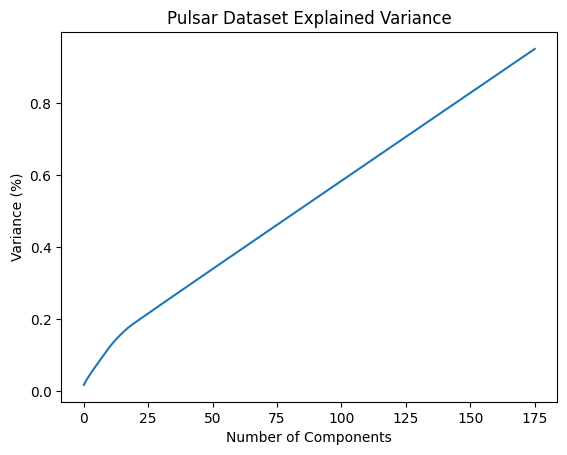

Text(0.5, 0, 'PCA 1')

Text(0, 0.5, 'PCA 2')

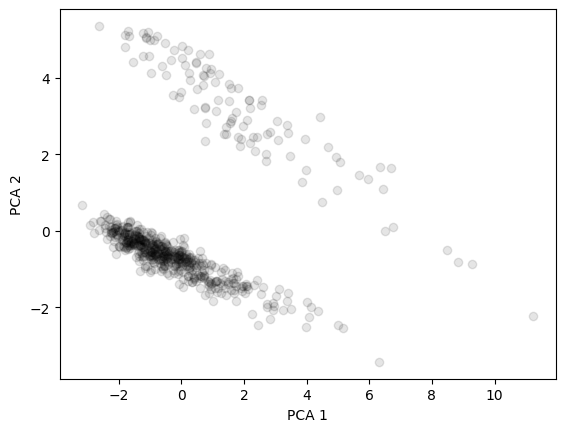

In [19]:
X_std = StandardScaler().fit_transform(new_df)
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_std) # Plot the explained variances

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

PCA_components = pd.DataFrame(principalComponents)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [20]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

100%|█████████████████████████████████████████████████████████| 19/19 [00:16<00:00,  1.15it/s]


[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 1.0, 'Elbow graph')]

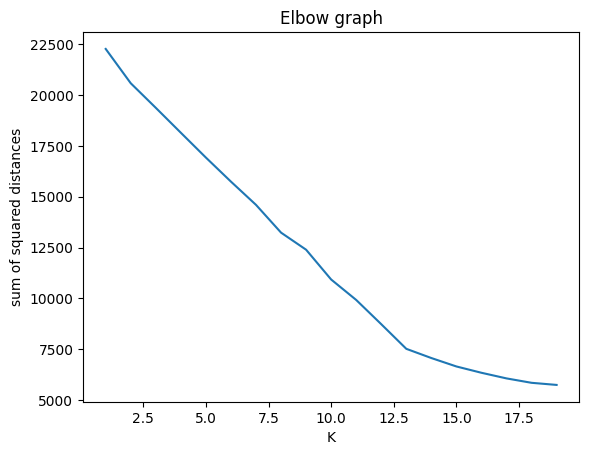

In [21]:
sum_of_squared_distances = []
K = tqdm(range(1,20))
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)
    
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')

In [22]:
kmeans = KMeans(n_clusters=13, n_init="auto")    
kmeans.fit(pca_df)
y_kmeans = kmeans.predict(pca_df)
y_kmeans

KMeans(n_clusters=13, n_init='auto')

array([ 2,  6, 10, 10, 10, 10, 10,  9,  1, 10, 10, 10, 10, 10,  0,  6, 10,
        9,  9, 10,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  0,
        9, 10,  1, 10,  0,  9,  0,  9,  9, 10,  1, 10, 10,  6,  6, 10,  3,
        1, 11, 10, 11, 10, 10,  9,  9, 10, 10,  9,  6,  9,  0, 10, 10,  9,
        9, 10, 10, 10,  9,  0,  9, 10,  9,  9, 10,  9, 10, 10, 10, 10,  9,
        9,  9, 10, 10, 10, 10,  1,  1,  0,  9, 10,  0, 10, 10,  0,  9, 10,
        1, 10, 10,  9,  9, 10, 11, 10, 10,  9,  0, 10, 10, 10,  9, 10,  9,
        9, 10, 10,  9, 10, 10, 10, 10, 10,  9,  9, 10, 10, 10,  9, 10,  9,
        3, 10,  9,  4, 10,  9,  3,  5,  9,  9, 10, 10, 10,  8,  9, 10, 10,
        6, 10, 10, 10,  5, 10, 10, 10, 10,  9,  9,  0,  9, 10,  9,  9, 10,
       10,  9,  9,  9,  0, 10, 10,  9,  9,  9, 10,  1,  0,  9,  9,  0, 10,
        1,  9,  9, 10,  9, 10, 10,  9,  0, 10,  9,  9, 10,  9, 10,  4, 10,
        6,  2,  1, 10, 10, 10, 10,  9,  3, 10, 10,  1,  0, 10,  9,  9,  4,
        9, 10,  9, 10,  6

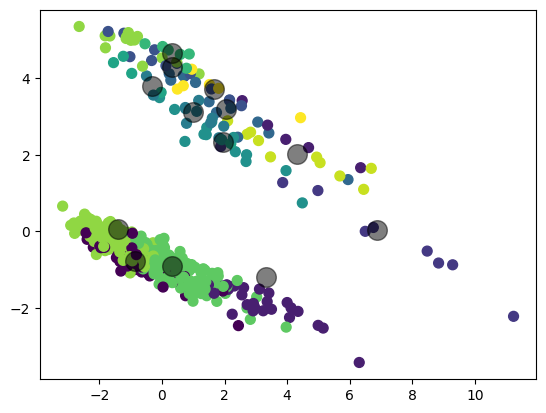

In [23]:
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [27]:
ac = AgglomerativeClustering(n_clusters=13, metric='euclidean', linkage='ward')
ac.fit_predict(pca_df)

array([ 4,  1,  2,  2,  2,  2,  2,  0,  0,  2,  2,  2,  2,  2,  2,  1,  2,
        0,  0,  2,  0,  0,  2,  2,  0,  0,  2,  2,  2,  2,  2,  2,  2,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  2,  2,  1,  1,  2, 12,
        0,  7,  2,  7,  2,  2,  2,  2,  2,  0,  0,  1,  0,  2,  2,  2,  0,
        0,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  0,  2,  2,  2,  2,  0,
        0,  2,  2,  2,  2,  2,  0,  0,  2,  2,  2,  2,  2,  2,  2,  0,  2,
       10,  2, 11,  2,  2,  2,  7,  2,  0,  2,  2,  2,  2, 11,  2,  2,  0,
        2,  2,  2,  2,  0,  2,  2,  2,  2,  0,  2,  2,  2,  2,  2,  2,  0,
       12, 11,  2,  5,  0,  0, 12,  6,  0,  0,  2,  0,  2,  9,  0,  2,  0,
        1, 11, 11,  2,  6,  2,  0,  2,  2,  2,  0,  2,  0,  2,  0,  0,  2,
        2,  2,  2,  0,  2, 11,  0,  2,  0,  0,  2,  0,  0,  0,  2,  2, 11,
       10,  2,  0,  2,  0,  2, 11,  2,  0,  2,  2,  0,  2,  2,  2,  5,  2,
        1,  4,  0,  2,  2,  2,  2,  2, 12,  2,  2,  0,  2,  2,  0,  0,  5,
        0,  2,  0, 11,  1

In [28]:
dbscan = DBSCAN(eps = 9, min_samples = 3)
dbscan.fit(pca_df)
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

DBSCAN(eps=9, min_samples=3)

Estimated number of clusters: 12


In [39]:
kmeans_labels = pd.Series(kmeans.labels_, name="kmeans labels")
ac_labels = pd.Series(ac.labels_, name="ac labels")
dbscan_labels = pd.Series(dbscan.labels_, name="dbscan labels")

silhouette_score(pca_df, kmeans_labels, metric='euclidean')
silhouette_score(pca_df, ac_labels, metric='euclidean')
silhouette_score(pca_df, dbscan_labels, metric='euclidean')

0.16767918326666603

0.20828737870573794

0.54305110852936

In [41]:
dbscan_df = new_df.join(dbscan_labels, how='left')
dbscan_df = dbscan_df.rename(columns = {0: 'labels'})
dbscan_df.head()

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_3OH!3,...,top genre_complextro,top genre_edm,top genre_hip hop,top genre_latin,top genre_neo mellow,top genre_other,top genre_permanent wave,top genre_pop,top genre_room,dbscan labels
0,97.0,89,67,-4.0,8,80,217,19,4,0,...,0,0,0,0,1,0,0,0,0,0
1,87.0,93,75,-5.0,52,64,263,24,23,0,...,0,0,1,0,0,0,0,0,0,1
2,120.0,84,76,-3.0,29,71,200,10,14,0,...,0,0,0,0,0,0,0,1,0,2
3,119.0,92,70,-4.0,8,71,295,0,4,0,...,0,0,0,0,0,0,0,1,0,2
4,109.0,84,64,-5.0,9,43,221,2,4,0,...,0,0,0,0,0,0,0,1,0,2


In [42]:
df_scaled = pd.DataFrame(new_df)
df_scaled['dbscan'] = dbscan.labels_
df_mean = (df_scaled.loc[df_scaled.dbscan!=-1, :].groupby('dbscan').mean())
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
    selected_columns = list(results.sort_values('Var', ascending=False,).head(7).Variable.values) + ['dbscan']
    tidy = df_scaled[selected_columns].melt(id_vars='dbscan')

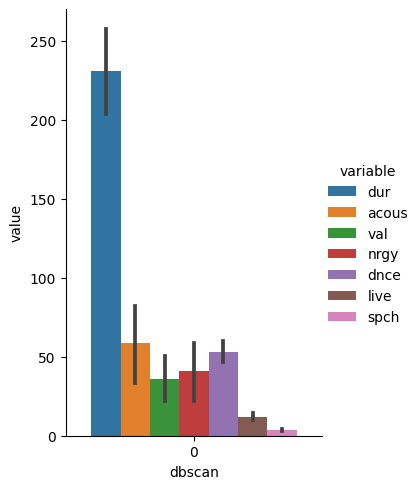

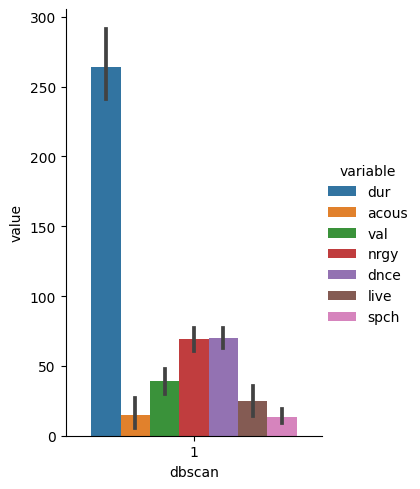

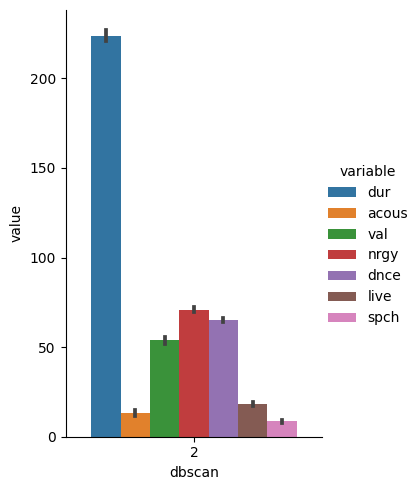

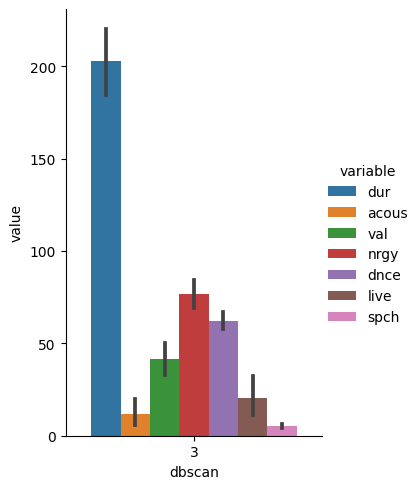

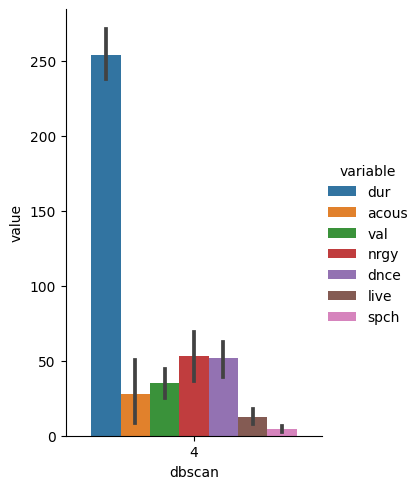

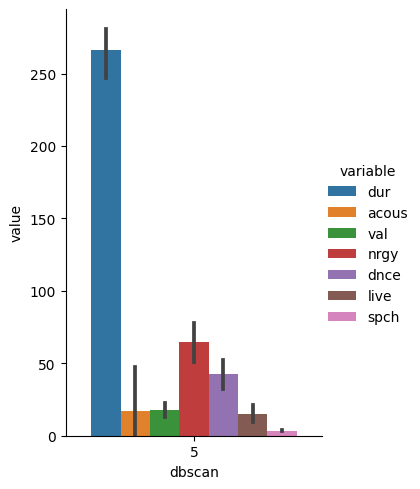

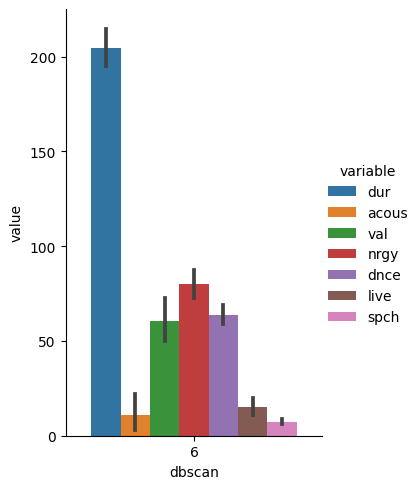

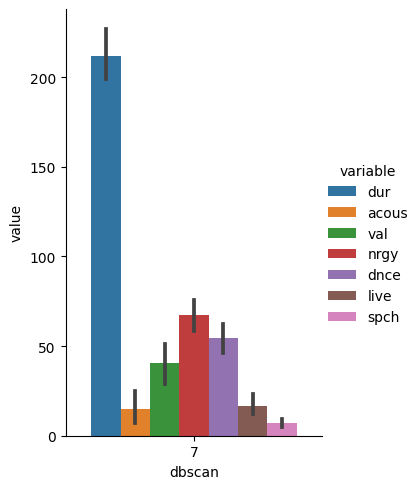

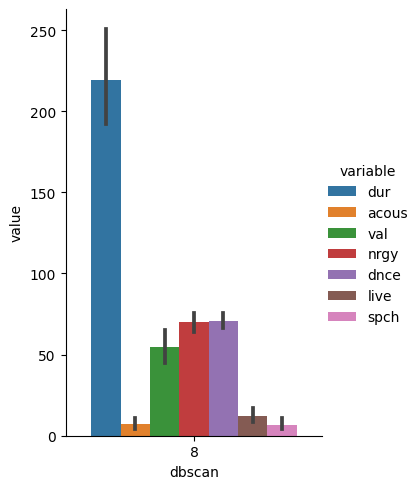

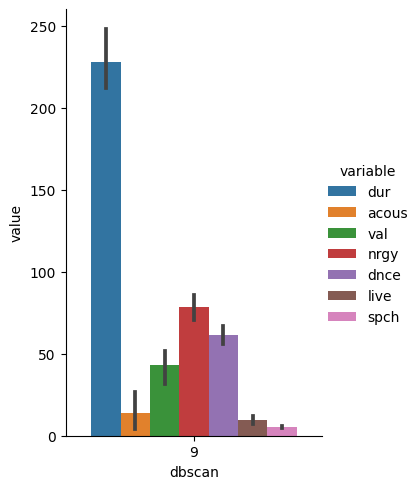

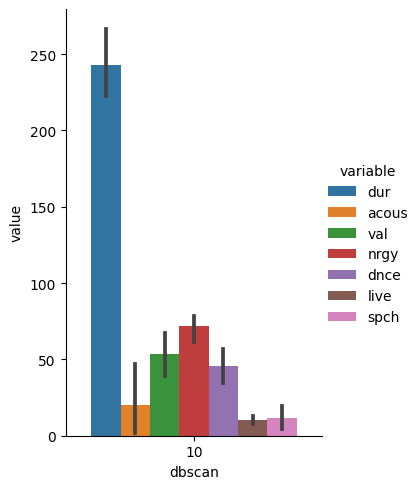

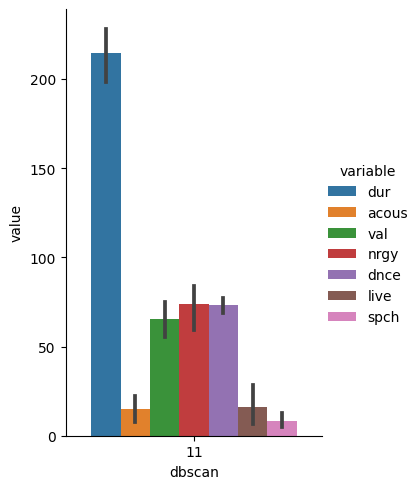

In [44]:
# 12 is the number of clusters in DBScan
for i in range(12):
    sns.catplot(x='dbscan', y='value', hue='variable', data=tidy[tidy['dbscan']==i], height=5, aspect=.7, kind='bar')
    plt.show()